In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import spacy

In [145]:
data = {
    "Lecture1_1" : "Информация - это сведения об объектах и явлениях окружающей среды, их параметрах, свойствах и состояниях, которые уменьшают имеющуюся о них степень неопределенности, неполноты знаний.",
    "Lecture1_2" : "Информация - это ключевое понятие современной науки, стоящее в одном ряду с понятиями \"вещество\" и \"энергия\"",
    "Lecture1_2" : "Информация - сведения об окружающем мире и протекающих в нем процессах, воспринимаемые человеком или специальными устройствами",
    "Lecture1_3" : "Информация - сообщения, передаваемые в форме знаков или сигналов",
    "Lecture1_4" : "Информация - cведения, которые снимают полностью или уменьшают существующую неопределенность",
    "Lecture1_5" : "Информация - эта та часть знаний, которая используется для ориентирования, активного действия, управления, т.е. в целях сохранения, совершенствования, развития системы",
    "Lecture1_6" : "Информация - то сведения, обладающие новизной",
    "Lecture1_7" : "Информация - это некоторая последовательность сведений, знаний, которые актуализируемы (получаемы, передаваемы, преобразуемы, сжимаемы и/или регистрируемы) с помощью некоторых знаков (символьного, образного, жестового, звукового, сенсомоторного типа).",
    "Lecture1_8" : "информация - изменение свойств наблюдателя (и субъекта, и объекта) частью свойств исследуемого объекта, в результате чего образуются модели (объекты), являющиеся функцией от свойств исследуемого объекта.",
    "Lecture1_9" : "информация - избыточность свойств моделей, возникающая в результате сравнения свойств ранее полученной объективной информации со свойствами текущей объективной информации, поступившей от объектов, имеющих подобные свойства.",
    "Wikipedia_1" : "информация - сведения (сообщения, данные) независимо от формы их представления",
    "ISO 5127:2017" : "информация - обработанные, организованные и связанные данные, которые порождают смысл (значение)",
    "ISO/IEC 10746-2:1996" : "информация - знания о предметах, фактах, идеях и т.д., которыми могут обмениваться люди в рамках конкретного контекста ",
    "SO/IEC 2382:2015" : "информация - знания относительно фактов, событий, вещей, идей и понятий, которые в определённом контексте имеют конкретный смысл",
    "ГОСТ 7.0-99" : "информация - сведения, воспринимаемые человеком и (или) специальными устройствами как отражение фактов материального или духовного мира в процессе коммуникации",
    "Wikipedia_2" : "информация - ведения, передаваемые людьми устным, письменным или каким-либо другим способом (с помощью условных сигналов, технических средств и т.д.)",
    "Urfu.ru" : "информация - это сведения о состоянии чего-либо, которые могут быть представлены в различной форме и в которые заложен некий смысл (идея, посыл). Источником информации могут выступать объекты живой и неживой природы (естественные), а также объекты, созданные человеком (неестественные).",
    "Umschool" : "Информация - это знания и сведения, которые необходимы для ориентирования и взаимодействия с окружающей средой.",
    "cyperlininka" : "Информация - способность воспринимать внутреннее состояние и воздействия окружающей среды, хранить их результаты, перерабатывать и передавать",
    "Wiener" : "Информация - Сведения, уменьшающие неопределенность",
    "Lenin" : "Информация - Отражение объективной реальности в сознании человека",
    "Kolmogorov_1" : "Информация - Способ организации и управления в самоорганизующихся системах",
    "ГОСТ 27488-87" : "Информация - Данные, представленные в форме, пригодной для обработки, хранения и передачи с помощью компьютера",
    "Harkevich" : "Информация - Совокупность сведений, независимо от формы их представления",
    "Shannon" : "Информация - Мера количества информации, содержащейся в сообщении",
    "Kolmogorov_2" : "Информация - Совокупность символов, несущих смысловую нагрузку",
    "Dobrushin" : "Информация - Алфавит и правила его использования для кодирования сообщений",
    "Vavilov" : "Информация - Совокупность сигналов, передаваемых между живыми организмами",
    "Watson" : "Информация - Генетический код, хранящийся в ДНК",
    "Darwin" : "Информация - признаки, передаваемые от родителей к потомкам",
    "Hayek" : "Информация - Товар, который имеет ценность для потребителя",
    "Drucker" : "Информация - Ресурс, который может быть использован для создания новых товаров и услуг",
    "Clark" : "Информация - Фактор производства, наряду с трудом и капиталом",
    "ГК РФ" : "Информация - Сведения, которые имеют юридическое значение",
    "УПК РФ" : "Информация - Доказательства, используемые в суде"
}

print(len(data))

34


In [6]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 6.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [146]:
import string

nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

lemmatized_data = {key: lemmatize_text(value) for key, value in data.items()}

print(len(lemmatized_data))

# Print the lemmatized data
for key, value in lemmatized_data.items():
    print(f"{key}: {value}")

34
Lecture1_1: информация   это сведение об объект и явление окружать среда они параметр свойство и состояние которые уменьшать иметься о них степень неопределённость неполнота знание
Lecture1_2: информация   сведение об окружать мир и протекать в нем процесс воспринимать человек или специальный устройство
Lecture1_3: информация   сообщение передавать в форма знак или сигнал
Lecture1_4: информация   cведения которые снимать полностью или уменьшать существовать неопределённость
Lecture1_5: информация   этот тот часть знание которая использоваться для ориентирование активный действие управление тот в цель сохранение совершенствование развитие система
Lecture1_6: информация   то сведение обладать новизной
Lecture1_7: информация   это некоторый последовательность сведение знание которые актуализируемы получаемы передаваемы преобразуемы сжимаемы иили регистрируемы с помощь некоторый знак символьный образный жестовый звуковой сенсомоторного тип
Lecture1_8: информация   изменение свойство наб

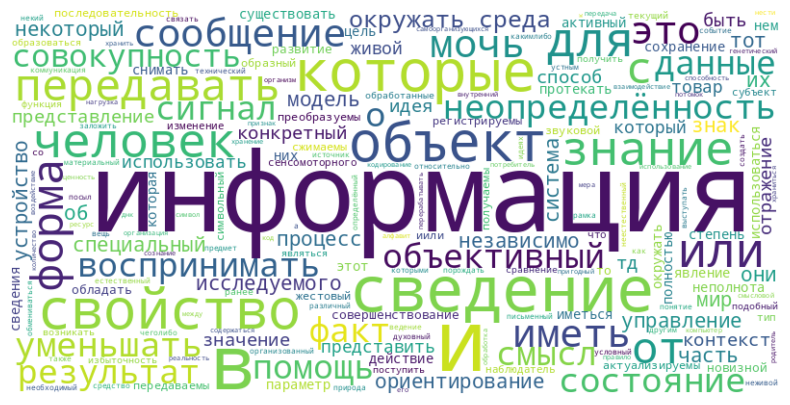

In [147]:
all_text = ' '.join(lemmatized_data.values())

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', prefer_horizontal = 0.9).generate(all_text)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [244]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(list(lemmatized_data.values()))

feature_names = vectorizer.get_feature_names_out()
document_names = list(lemmatized_data.keys())

scores = {}

for i, document_name in enumerate(document_names):
    sum = 0
    word_count = 0

    print(f"\n{document_name}:")
    max_tfidf_index = np.argmax(tfidf_matrix[i])
    max_tfidf_word = feature_names[max_tfidf_index]

    for j, feature_name in enumerate(feature_names):
        tfidf_coefficient = tfidf_matrix[i, j]
        if tfidf_coefficient > 0:
            print(f"{feature_name}: {tfidf_coefficient:.4f}")
            sum += tfidf_coefficient * len(feature_name)
            word_count += 1

    scores[document_name] = sum / word_count

    print(f"Best Word: \"{max_tfidf_word}\" with TF-IDF: {tfidf_matrix[i, max_tfidf_index]:.4f}")
    print(f"Score: {(sum / word_count):.4f}")


Lecture1_1:
знание: 0.1812
иметься: 0.2682
информация: 0.0695
которые: 0.1638
неопределённость: 0.2201
неполнота: 0.2682
них: 0.2682
об: 0.2401
объект: 0.2046
окружать: 0.2046
они: 0.2401
параметр: 0.2682
сведение: 0.1438
свойство: 0.2201
состояние: 0.2201
среда: 0.2201
степень: 0.2682
уменьшать: 0.2201
это: 0.2046
явление: 0.2682
Best Word: "иметься" with TF-IDF: 0.2682
Score: 1.5050

Lecture1_2:
воспринимать: 0.2801
или: 0.2442
информация: 0.0884
мир: 0.3055
нем: 0.3413
об: 0.3055
окружать: 0.2604
протекать: 0.3413
процесс: 0.3055
сведение: 0.1830
специальный: 0.3055
устройство: 0.3055
человек: 0.2306
Best Word: "нем" with TF-IDF: 0.3413
Score: 1.8704

Lecture1_3:
знак: 0.4679
или: 0.3741
информация: 0.1354
передавать: 0.3741
сигнал: 0.4289
сообщение: 0.3987
форма: 0.3741
Best Word: "знак" with TF-IDF: 0.4679
Score: 2.3029

Lecture1_4:
cведения: 0.3985
или: 0.2851
информация: 0.1032
которые: 0.2433
неопределённость: 0.3269
полностью: 0.3985
снимать: 0.3985
существовать: 0.3985
умень

In [239]:
sorted_scores = dict(sorted(scores.items(), key = lambda item: item[1], reverse = True))

for key, value in sorted_scores.items():
    print(f"{key}: {value:.4f}")

Wiener: 0.4670
УПК РФ: 0.4656
Shannon: 0.4363
Watson: 0.4224
Lecture1_6: 0.4144
Kolmogorov_1: 0.3897
Clark: 0.3894
Kolmogorov_2: 0.3888
Lenin: 0.3877
Darwin: 0.3865
ГК РФ: 0.3840
Lecture1_3: 0.3647
Vavilov: 0.3621
Hayek: 0.3613
Harkevich: 0.3394
Dobrushin: 0.3388
Wikipedia_1: 0.3215
ISO 5127:2017: 0.3206
Lecture1_4: 0.3199
Drucker: 0.2928
ГОСТ 27488-87: 0.2919
Umschool: 0.2902
cyperlininka: 0.2702
ISO/IEC 10746-2:1996: 0.2697
Lecture1_2: 0.2690
SO/IEC 2382:2015: 0.2598
ГОСТ 7.0-99: 0.2484
Wikipedia_2: 0.2439
Lecture1_5: 0.2297
Lecture1_8: 0.2232
Lecture1_1: 0.2181
Lecture1_9: 0.2140
Lecture1_7: 0.2028
Urfu.ru: 0.1869


In [240]:
lexical_density_values = {}

for key, value in lemmatized_data.items():
    text = value.translate(str.maketrans("", "", string.punctuation))
    doc = nlp(text)

    total_words = len(doc)
    content_words = len([token for token in doc if not token.is_stop])
    lexical_density = (content_words / total_words)

    lexical_density_values[key] = lexical_density

    print(f"{key}: {lexical_density:.4f}")

Lecture1_1: 0.6667
Lecture1_2: 0.6875
Lecture1_3: 0.7778
Lecture1_4: 0.8000
Lecture1_5: 0.7000
Lecture1_6: 0.8333
Lecture1_7: 0.8000
Lecture1_8: 0.8000
Lecture1_9: 0.7600
Wikipedia_1: 0.7000
ISO 5127:2017: 0.7273
ISO/IEC 10746-2:1996: 0.7059
SO/IEC 2382:2015: 0.7647
ГОСТ 7.0-99: 0.7368
Wikipedia_2: 0.7895
Urfu.ru: 0.6579
Umschool: 0.6000
cyperlininka: 0.8125
Wiener: 1.0000
Lenin: 0.8750
Kolmogorov_1: 0.7778
ГОСТ 27488-87: 0.6667
Harkevich: 0.7778
Shannon: 0.8750
Kolmogorov_2: 1.0000
Dobrushin: 0.7000
Vavilov: 0.8750
Watson: 0.8571
Darwin: 0.7500
Hayek: 0.6250
Drucker: 0.6154
Clark: 0.7778
ГК РФ: 0.7143
УПК РФ: 0.8333


In [241]:
sorted_lexical_density = dict(sorted(lexical_density_values.items(), key = lambda item: item[1], reverse = True))

for key, value in sorted_lexical_density.items():
    print(f"{key}: {value:.4f}")

Wiener: 1.0000
Kolmogorov_2: 1.0000
Lenin: 0.8750
Shannon: 0.8750
Vavilov: 0.8750
Watson: 0.8571
Lecture1_6: 0.8333
УПК РФ: 0.8333
cyperlininka: 0.8125
Lecture1_4: 0.8000
Lecture1_7: 0.8000
Lecture1_8: 0.8000
Wikipedia_2: 0.7895
Lecture1_3: 0.7778
Kolmogorov_1: 0.7778
Harkevich: 0.7778
Clark: 0.7778
SO/IEC 2382:2015: 0.7647
Lecture1_9: 0.7600
Darwin: 0.7500
ГОСТ 7.0-99: 0.7368
ISO 5127:2017: 0.7273
ГК РФ: 0.7143
ISO/IEC 10746-2:1996: 0.7059
Lecture1_5: 0.7000
Wikipedia_1: 0.7000
Dobrushin: 0.7000
Lecture1_2: 0.6875
Lecture1_1: 0.6667
ГОСТ 27488-87: 0.6667
Urfu.ru: 0.6579
Hayek: 0.6250
Drucker: 0.6154
Umschool: 0.6000


In [245]:
harmonic_means = {}

for key in scores.keys():
    score_value = scores[key]
    lexical_density_value = lexical_density_values[key]

    harmonic_mean = 2 / ((1 / score_value) + (1 / lexical_density_value))

    harmonic_means[key] = harmonic_mean

for key, value in harmonic_means.items():
    print(f"{key}: {value:.4f}")

Lecture1_1: 0.9240
Lecture1_2: 1.0054
Lecture1_3: 1.1628
Lecture1_4: 1.2541
Lecture1_5: 1.0081
Lecture1_6: 1.2754
Lecture1_7: 1.1105
Lecture1_8: 1.0940
Lecture1_9: 1.0413
Wikipedia_1: 1.0711
ISO 5127:2017: 1.1560
ISO/IEC 10746-2:1996: 1.0135
SO/IEC 2382:2015: 1.0858
ГОСТ 7.0-99: 1.0626
Wikipedia_2: 1.0869
Urfu.ru: 0.8765
Umschool: 0.9632
cyperlininka: 1.2242
Wiener: 1.6800
Lenin: 1.4037
Kolmogorov_1: 1.3082
ГОСТ 27488-87: 1.0289
Harkevich: 1.1987
Shannon: 1.4208
Kolmogorov_2: 1.5116
Dobrushin: 1.1079
Vavilov: 1.3286
Watson: 1.3267
Darwin: 1.1771
Hayek: 1.0011
Drucker: 0.9195
Clark: 1.2158
ГК РФ: 1.1632
УПК РФ: 1.4051


In [246]:
sorted_harmonic_means = dict(sorted(harmonic_means.items(), key = lambda item: item[1], reverse = True))

for key, value in sorted_harmonic_means.items():
    print(f"{key}: {value:.4f}")

Wiener: 1.6800
Kolmogorov_2: 1.5116
Shannon: 1.4208
УПК РФ: 1.4051
Lenin: 1.4037
Vavilov: 1.3286
Watson: 1.3267
Kolmogorov_1: 1.3082
Lecture1_6: 1.2754
Lecture1_4: 1.2541
cyperlininka: 1.2242
Clark: 1.2158
Harkevich: 1.1987
Darwin: 1.1771
ГК РФ: 1.1632
Lecture1_3: 1.1628
ISO 5127:2017: 1.1560
Lecture1_7: 1.1105
Dobrushin: 1.1079
Lecture1_8: 1.0940
Wikipedia_2: 1.0869
SO/IEC 2382:2015: 1.0858
Wikipedia_1: 1.0711
ГОСТ 7.0-99: 1.0626
Lecture1_9: 1.0413
ГОСТ 27488-87: 1.0289
ISO/IEC 10746-2:1996: 1.0135
Lecture1_5: 1.0081
Lecture1_2: 1.0054
Hayek: 1.0011
Umschool: 0.9632
Lecture1_1: 0.9240
Drucker: 0.9195
Urfu.ru: 0.8765
